## Optimized Random Forest Classifier

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 

In [2]:
dataset = pd.read_csv("/home/alicja/Documents/ultimateData.csv")
dataset.set_index('label')

,thiG,siaM,imuB,pbpC,dhbE,anmK,irtA,group_2298,yvoA_3,group_2552,...,YP_003358396.1,YP_003358397.1,YP_002455933.1,YP_002455973.1,YP_002456003.1,YP_002456020.1,YP_003358384.1,YP_003358386.1,YP_003358385.1,value
label,,,,,,,,,,,,,,,,,,,,,
PSA-BAB-IMI-102140_14-1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lbl3,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_lkd16,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lma1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_luz19,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz24,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz7,3,3,3,3,2,2,2,2,2,1,...,1,1,0,0,0,0,1,1,1,0
PSA-BAB-IMI-102140_pb1,3,3,3,3,2,2,2,2,2,1,...,0,0,1,1,1,1,0,0,0,1
PSA-BAB-IMI-102141_14-1,3,3,3,3,2,2,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = dataset['value'].values
features = dataset.drop('value', axis=1).values

In [4]:
features = features[:,1:].astype(np.float32)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [6]:
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [16]:
dimensionality_reductors = [PCA(n_components=0.99), PCA(n_components=0.95), PCA(n_components=0.90), None]
random_forest = RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None,
            max_features=0.20603235165277012, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)
preprocess = [StandardScaler(), None]
balancers = [SMOTE(), None]

Model optimized with Hyperopt - Accuracy 79%
Best model: RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None,
            max_features=0.20603235165277012, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)
No preprocessing

In [28]:
results = []
for process in dimensionality_reductors:
    for scaler in preprocess:
        for balancer in balancers:
            processName = str(type(process).__name__) + 'process'
            balancerName = str(type(balancer).__name__) + 'balancer'
            scalerName =  str(type(scaler).__name__) + 'scaler'
            pipe = Pipeline(steps=[(scalerName, scaler), (processName, process), (balancerName, balancer), ("random_forest", random_forest)])
            pipeline_fitted = pipe.fit(X_train, y_train)
            predictions = pipeline_fitted.predict(X_test)
            F1 = f1_score(y_test, predictions)
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions)
            recall = recall_score(y_test, predictions)
            results.append([processName,scalerName, balancerName , 'random_forest', F1, accuracy, precision, recall])
            
df_results = pd.DataFrame(results, columns = ['Dimensionality_Reductor', 'Scaler', 'Balancer' ,'Classifier', 'F1', 'Accuracy', 'Precision', 'Recall'])

In [29]:
df_results.sort_values(by=['F1'])

,Dimensionality_Reductor,Scaler,Balancer,Classifier,F1,Accuracy,Precision,Recall
3,PCAprocess,NoneTypescaler,NoneTypebalancer,random_forest,0.547993,0.759070,0.646091,0.475758
7,PCAprocess,NoneTypescaler,NoneTypebalancer,random_forest,0.571924,0.770233,0.668016,0.500000
6,PCAprocess,NoneTypescaler,SMOTEbalancer,random_forest,0.591870,0.766512,0.638596,0.551515
5,PCAprocess,StandardScalerscaler,NoneTypebalancer,random_forest,0.592346,0.772093,0.656827,0.539394
2,PCAprocess,NoneTypescaler,SMOTEbalancer,random_forest,0.593333,0.773023,0.659259,0.539394
4,PCAprocess,StandardScalerscaler,SMOTEbalancer,random_forest,0.595944,0.759070,0.614148,0.578788
14,NoneTypeprocess,NoneTypescaler,SMOTEbalancer,random_forest,0.598985,0.779535,0.678161,0.536364
11,PCAprocess,NoneTypescaler,NoneTypebalancer,random_forest,0.600000,0.773023,0.653571,0.554545
9,PCAprocess,StandardScalerscaler,NoneTypebalancer,random_forest,0.600985,0.773953,0.655914,0.554545
1,PCAprocess,StandardScalerscaler,NoneTypebalancer,random_forest,0.602291,0.773953,0.654804,0.557576


In [19]:
random_forest = RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None,
            max_features=0.20603235165277012, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)
scaling = StandardScaler()
balancer = SMOTE()

In [20]:
pipeline = Pipeline(steps=[('scaler', scaling), ('balancer', balancer), ('random_forest', random_forest)])

In [21]:
fit = pipeline.fit(X_train, y_train)

In [22]:
pred = fit.predict(X_test)

In [23]:
F1 = f1_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(F1, accuracy, precision, recall)

0.6470588235294118 0.7990697674418604 0.7021276595744681 0.6


In [15]:
random_forest.feature_importances_

array([2.13260221e-04, 1.20304812e-04, 4.56049585e-05, ...,
       8.67647808e-05, 9.64734692e-05, 4.06901042e-05])

Cross-validate the score and get feature importance

In [9]:
from tabulate import tabulate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

In [10]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(pipeline, features, labels, cv=cv)  

array([0.79733879, 0.77686796, 0.790174  , 0.79938588, 0.79426817])

In [11]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

NameError: name 'cv_score' is not defined

In [30]:
headers = ["name", "score"]
values = sorted(zip(dataset.columns, random_forest.feature_importances_), key=lambda x: x[1] * -1)
feature_importance_table = tabulate(values, headers, tablefmt="plain")

In [85]:
most_important = values[:20]
key = []
value = []
for element in most_important:
    key.append(element[0])
    value.append(element[1])

In [86]:
value = np.array(value)

In [87]:
len(key)

20

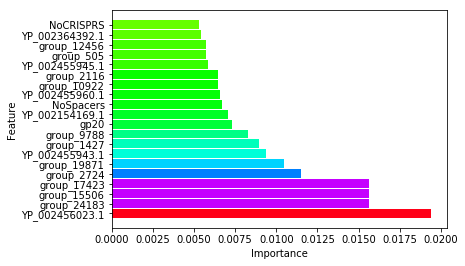

In [99]:
from matplotlib import cm
colors = cm.hsv(value / float(max(value)))
plt.barh(y=key, width=value, color=colors, height = 0.9)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('featureImportance.png', bbox_inches='tight', dpi=600)

<Figure size 432x288 with 0 Axes>

Retrain on subset of data

In [ ]:
%%time
results = {}
for number in np.linspace(0.1, int(1),10):
    X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=number)
    svm = cross_val_score(best_classifier, X_test, y_test, cv=10)
    results[number] = svm

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
full_score = cross_val_score(pipeline, features, labels, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0))
results[1] = full_score

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(results.values())
ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_xlabel('Fraction of the dataset')
ax.set_ylabel('CV score')

In [ ]:
fig.savefig('convergence.png')